# 期中專題--肥胖率的城鄉差距


動機：

世界衛生組織指出，肥胖是一種慢性病，且會提高個體高血壓、糖尿病等慢性病發生率，甚至是降低壽命，為不可忽視的國民健康議題。而肥胖的成因多與生活習慣和運動習慣有關。而不同的縣市因為生活環境不同，其生活型態也不盡相同，而導致肥胖率會有區域性差異；例如都市地區多以上班族為主，長期久坐不運動、常常聚餐可能會造成肥胖，或是大眾交通運輸不便，長期以汽機車代步的偏鄉地區之肥胖率也可能比有捷運的都市高。因此在這次的專題，想要透過地圖和回歸分析，去查看不同縣市的肥胖率是否也有差距？並且去分析造成肥胖率差距的可能原因為何？

資料來源：
衛生福利部國民健康署
中華民國統計資訊網
政府開放資料平台

In [1]:

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import requests
import matplotlib as mpl      #在 matplotlib 中顯示中文
import matplotlib
matplotlib.matplotlib_fname()
mpl.rc('font', family='DejaVu Sans')
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
from sklearn.linear_model import LinearRegression            #線性迴歸
#地圖
import geopandas as gp


## 縣市肥胖地圖和運動地圖

從這些肥胖地圖分佈來看，可以發現：肥胖率也有城鄉差距。鄉村地區的人（尤其是花東地區）相較於都市的人（ex:六都）肥胖率較高。這是滿意外的結果，畢竟我們通常會認為都市人久坐缺乏運動，或是常常仰賴外食，體態應該會比較差，但結果恰恰相反。

而肥胖可能跟缺乏運動習慣有關係，因此我們做了縣市成人每天運動時間地圖。從地圖上來看，運動時數最多的是大台北地區的人，其次是台中人。這不太意外，畢竟這些地方大眾交通運輸發達，人們在搭乘大眾交通運輸的時候本來就會比以汽機車代步的人多走路。而運動時數少的地區分佈在雲嘉南，嘉義縣市全台運動時數最少的地方，這好像也解釋得通，畢竟我們是騎小綿羊的遊牧民族嘛（？

＊肥胖定義：BMI>27

＊運動時間是衛生福利部國民健康署經過抽樣調查得來，其運動的定義較廣泛，包括通勤走路、搬運重物等強度較輕的活動。

In [2]:
df = pd.read_csv('fat.csv')
fat = df.iloc[0:20,5]  
exer = df.iloc[0:20,6]  
exer1 = df.iloc[0:20,7]  
county_shp = gp.read_file('./mapdata201805310314/COUNTY_MOI_1070516.shp')
left = county_shp.set_index('COUNTYENG')                   #left: map frame
right = df.set_index('依縣市別分by county.1')                  #right: datas
joint_shp = left.join(right)                                            #joint two tables
joint_shp = joint_shp.fillna(0)                                      # NA-->0
joint_shp.head()


,COUNTYID,COUNTYCODE,COUNTYNAME,geometry,依縣市別分by county,有效樣本數Sample Size,男Male (%),女Female (%),不分性別Both (%),平均每天運動時間,65 歲以上老人一週運動比率(%)
COUNTYENG,,,,,,,,,,,
Lienchiang County,Z,09007,é£æ±ç¸£,(POLYGON ((119.9644519140001 25.94552317400007...,0,0,0.00,0.00,0.00,0.00,0.0
Yilan County,G,10002,å®è­ç¸£,(POLYGON ((121.9597084550001 24.84493697000005...,宜蘭縣,962,47.65,34.21,41.10,0.91,56.5
Changhua County,N,10007,å½°åç¸£,"POLYGON ((120.4565526600001 24.20718620500008,...",彰化縣,966,48.77,32.33,40.69,0.90,45.8
Nantou County,M,10008,åæç¸£,"POLYGON ((121.2708644380001 24.23660985400005,...",南投縣,991,47.47,32.27,40.18,1.00,49.7
Yunlin County,P,10009,é²æç¸£,"(POLYGON ((120.081077282 23.52412216400006, 12...",雲林縣,946,54.42,30.59,43.46,0.87,37.0


(21.5, 25.5)

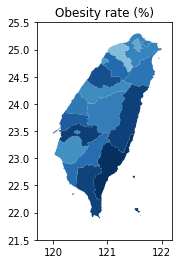

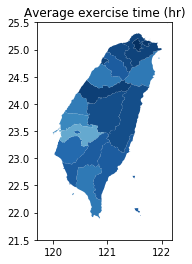

In [3]:
# Obesity rate (%)
joint_shp.plot(column='不分性別Both (%)', cmap='RdBu')    
plt.title('Obesity rate (%)')                    #深色＝肥胖比率高
plt.xlim((119.7, 122.2))
plt.ylim((21.5, 25.5))


# 成人平均每天運動時間
joint_shp.plot(column='平均每天運動時間', cmap='RdBu')   
plt.title('Average exercise time (hr)')                    #深色＝運動時間長
plt.xlim((119.7, 122.2))
plt.ylim((21.5, 25.5))

## 肥胖率和運動的回歸分析

a= [[-23.86664119]]
b= [63.9382757]
R2= 0.24143048444081416
a= [[-0.24508196]]
b= [54.31324575]
R2= 0.2819113910680002


Text(0,0.5,'Obesity rate(%)')

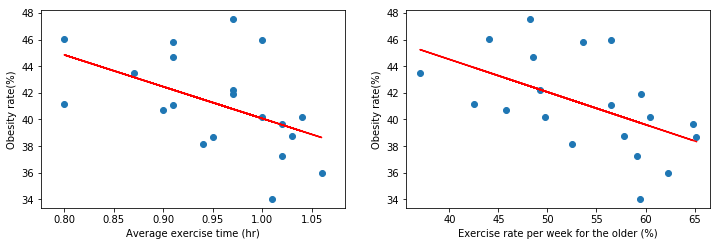

In [4]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
###平均每天運動時間與肥胖率回歸
plt.scatter(exer, fat)
x=np.array(exer)
y=np.array(fat)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Average exercise time (hr)')
plt.ylabel('Obesity rate(%)')


plt.subplot(2,2,2)
###平均每天運動時間與肥胖率回歸
plt.scatter(exer1, fat)
x=np.array(exer1)
y=np.array(fat)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Exercise rate per week for the older (%)')
plt.ylabel('Obesity rate(%)')

但問題來了，經過迴歸分析後，可發現運動時間和肥胖雖呈負相關，但似乎相關不高(R^2=0.24)。
而且雲嘉南的運動時數少於花東，但花東的肥胖率卻是居全台之首。這是為什麼呢？

## 不同縣市所得與肥胖比率之間的關係
由於肥胖率高的地區大多分佈在偏鄉地區（例如花東、嘉義、南投等），而這些地方也是經濟收入較不好的地方，因此本文又製作了縣市所得地圖，想觀察縣市之間的經濟程度是否與肥胖率有關？

In [25]:
df3 = pd.read_csv('economy.csv')
df4 = df3.iloc[0:20,1:5]    
df4.head()
eco = df4.iloc[0:20,2]      
eco2 = df4.iloc[0:20,3]      
eco


county_shp = gp.read_file('./mapdata201805310314/COUNTY_MOI_1070516.shp')
left = county_shp.set_index('COUNTYENG')                   #left: map frame
right = df.set_index('依縣市別分by county.1')                  #right: datas
joint_shp = left.join(right) 

right2 = df4.set_index('縣市別En')  
joint_shp = joint_shp.join(right2)                                            #joint two tables
joint_shp = joint_shp.fillna(0)                                      # NA-->0
joint_shp.head()


,COUNTYID,COUNTYCODE,COUNTYNAME,geometry,依縣市別分by county,有效樣本數Sample Size,男Male (%),女Female (%),不分性別Both (%),平均每天運動時間,65 歲以上老人一週運動比率(%),平均每戶全年經常性收入,Average Disposable Income,Median Disposable Income
COUNTYENG,,,,,,,,,,,,,,
Lienchiang County,Z,09007,é£æ±ç¸£,(POLYGON ((119.9644519140001 25.94552317400007...,0,0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0
Yilan County,G,10002,å®è­ç¸£,(POLYGON ((121.9597084550001 24.84493697000005...,宜蘭縣,962,47.65,34.21,41.10,0.91,56.5,1116452.0,906825.0,761876.0
Changhua County,N,10007,å½°åç¸£,"POLYGON ((120.4565526600001 24.20718620500008,...",彰化縣,966,48.77,32.33,40.69,0.90,45.8,1027431.0,838103.0,713043.0
Nantou County,M,10008,åæç¸£,"POLYGON ((121.2708644380001 24.23660985400005,...",南投縣,991,47.47,32.27,40.18,1.00,49.7,945572.0,775270.0,632100.0
Yunlin County,P,10009,é²æç¸£,"(POLYGON ((120.081077282 23.52412216400006, 12...",雲林縣,946,54.42,30.59,43.46,0.87,37.0,924616.0,753126.0,625613.0


(21.5, 25.5)

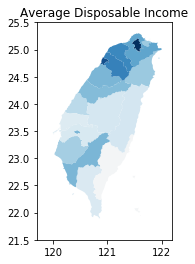

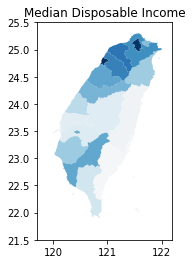

In [28]:
# 每戶可支配所得中位數
joint_shp.plot(column='Average Disposable Income', cmap='RdBu') 
plt.title('Average Disposable Income')                    #深色＝運動時間長
plt.xlim((119.7, 122.2))
plt.ylim((21.5, 25.5))

# 家庭收支-平均每戶可支配所得
joint_shp.plot(column='Median Disposable Income', cmap='RdBu')    
plt.title('Median Disposable Income')                    #深色＝肥胖比率高
plt.xlim((119.7, 122.2))
plt.ylim((21.5, 25.5))

從縣市所得地圖來看，我們就能發現花東地區的家庭可支配所得中位數是全台最低的。而肥胖率偏高的嘉義縣和南投縣，其家庭可支配所得中位數也是偏低。

## 肥胖率和運動的回歸分析

a= [[-1.5739063e-05]]
b= [55.76456448]
R2= 0.5256036221026579
a= [[-1.64063255e-05]]
b= [54.23180701]
R2= 0.5316483871639177


Text(0,0.5,'Obesity rate(%)')

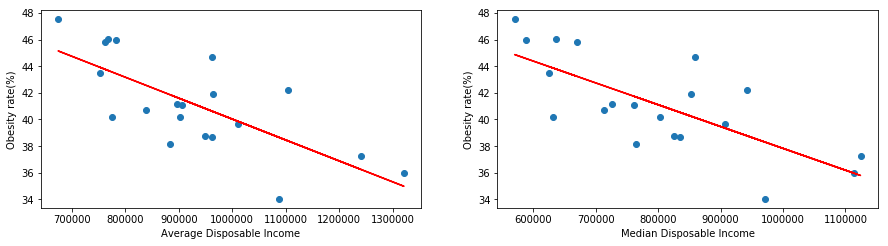

In [29]:

plt.figure(figsize=(15, 8))
plt.subplot(2,2,1)
###家庭平均可支配所得與肥胖率回歸
plt.scatter(eco, fat)
x=np.array(eco)
y=np.array(fat)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Average Disposable Income')
plt.ylabel('Obesity rate(%)')

plt.subplot(2,2,2)
#家庭可支配所得中位數與肥胖率回歸
plt.scatter(eco2, fat)
x=np.array(eco2)
y=np.array(fat)
X = x.reshape(len(x), 1)
Y = y.reshape(len(y), 1)
regr = LinearRegression()                
regr.fit(X, Y)
print('a=', regr.coef_)                   #印出斜率
print('b=', regr.intercept_ )            #印出截距
print('R2=', regr.score(X,Y) )            #印出判定係數
Y_lin = regr.predict(X)
plt.plot(x, Y_lin, 'r')
plt.xlabel('Median Disposable Income')
plt.ylabel('Obesity rate(%)')

回歸分析後，可以發現相較於運動時間，不同縣市的家庭可支配所得平均和家庭可支配所得中位數與肥胖率有更高的負相關性(R2=0.53, R=0.73)。收入較低的地區，往往有較高的肥胖率。
而造成這樣的現象可能有幾種原因：首先，偏鄉地區收入較少，經濟負擔大，勞工多且工時長，加上連鎖生鮮超市不多，使得生活在這些地區的人較難購入較高價位的新鮮健康食材，或無暇顧及健康飲食，轉而食用快速、易飽足的速食以求飽食。但是熱量高又低價的食物通常不健康，常常是多糖、多油又多鹽（例如便宜的小吃、熱炒、便當、速食、鹽酥雞等）。因為貧富差距所養成的飲食習慣差異，很有可能才是造成肥胖率城鄉差距的主因。也就是說，肥胖並不單純是因為懶得動，有時候貧窮才是原罪。

＊可支配所得為「實際收到的所得」（net pay）。

＊資料來源：BMI也有城鄉差距？全國營養調查：台東最胖、台北最瘦...。關鍵評論網。 https://www.thenewslens.com/article/14716